# Lending Club

### Autores: Matias Corredoira de Soto y Pablo Revuelta Stobbs

#### 05/12/2020

# Limpieza de datos e ingenieria de variables

# 1. Librerias y carga de datos

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot  as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [2]:
pathfile1 = '../data/Loan_training_set_1_4.csv'
pathfile2 = '../data/Loan_training_set_2_4.csv'
pathfile3 = '../data/Loan_training_set_3_4.csv'
pathfile4 = '../data/Loan_training_set_4_4.csv'

In [3]:
prestamos1 = pd.read_csv(pathfile1, header = 1, skipfooter = 2, engine = 'python')
prestamos2 = pd.read_csv(pathfile2, header = 1, skipfooter = 2, engine = 'python')
prestamos3 = pd.read_csv(pathfile3, header = 1, skipfooter = 2, engine = 'python')
prestamos4 = pd.read_csv(pathfile4, header = 1, skipfooter = 2, engine = 'python')

In [4]:
loans = pd.concat ([prestamos1, prestamos2, prestamos3, prestamos4])
loans.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,112435993,NaN,2300,2300,2300.0,36 months,12.62%,77.08,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,112290210,NaN,16000,16000,16000.0,60 months,12.62%,360.95,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,112436985,NaN,6025,6025,6025.0,36 months,15.05%,209.01,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,112439006,NaN,20400,20400,20400.0,36 months,9.44%,652.91,B,B1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,112438929,NaN,13000,13000,13000.0,36 months,11.99%,431.73,B,B5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


# 2. Limpieza dataset

## Duplicados
En primer lugar buscaremos la posible existencias de valores duplicados para eliminarlos del dataset.

In [5]:
duplicated = loans.duplicated()
duplicated_true = duplicated[duplicated == 'True']
duplicated_true.count()

0

In [6]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 884876 entries, 0 to 421094
Columns: 151 entries, id to settlement_term
dtypes: float64(68), int64(44), object(39)
memory usage: 1.0+ GB


La base de datos cuenta con 884884 observaciones, entre las cuales no existe ningún duplicado, junto con 151 variables. De las cuales 111 son de tipo float y 40 de tipo object.

## 3. Eliminación de variables

### Variables post entrega del crédito
En una primera limpieza de la base de datos, se eliminan todas las variables que son referidas al momento posterior de la entrega del crédito, ya que son variables que se desconocerían a la hora de ejecutar el modelo y si se mantuviesen sesgarían el modelo.

Las variables que se van a eliminar son:

In [7]:
loans_descarte_1 = loans.loc[:, ['funded_amnt', 'funded_amnt_inv', 'last_fico_range_high', 'member_id', 'last_fico_range_low', 'id', 'issue_d', 'last_credit_pull_d', 'last_pymnt_amnt', 'last_pymnt_d', 'loan_amnt', 'next_pymnt_d', 'out_prncp', 'out_prncp_inv', 'pymnt_plan', 'recoveries', 'sub_grade', 'total_pymnt', 'total_pymnt_inv', 'total_rec_int', 'total_rec_late_fee', 'total_rec_prncp', 'url', 'hardship_type', 'deferral_term', 'hardship_amount', 'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date', 'hardship_length', 'hardship_dpd', 'hardship_loan_status', 'orig_projected_additional_accrued_interest', 'hardship_payoff_balance_amount', 'hardship_last_payment_amount', 'disbursement_method', 'debt_settlement_flag', 'debt_settlement_flag_date', 'settlement_status', 'settlement_date', 'settlement_amount', 'settlement_percentage', 'settlement_term', 'hardship_flag', 'hardship_reason', 'hardship_status', 'collection_recovery_fee']]
list(loans_descarte_1)

['funded_amnt',
 'funded_amnt_inv',
 'last_fico_range_high',
 'member_id',
 'last_fico_range_low',
 'id',
 'issue_d',
 'last_credit_pull_d',
 'last_pymnt_amnt',
 'last_pymnt_d',
 'loan_amnt',
 'next_pymnt_d',
 'out_prncp',
 'out_prncp_inv',
 'pymnt_plan',
 'recoveries',
 'sub_grade',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_int',
 'total_rec_late_fee',
 'total_rec_prncp',
 'url',
 'hardship_type',
 'deferral_term',
 'hardship_amount',
 'hardship_start_date',
 'hardship_end_date',
 'payment_plan_start_date',
 'hardship_length',
 'hardship_dpd',
 'hardship_loan_status',
 'orig_projected_additional_accrued_interest',
 'hardship_payoff_balance_amount',
 'hardship_last_payment_amount',
 'disbursement_method',
 'debt_settlement_flag',
 'debt_settlement_flag_date',
 'settlement_status',
 'settlement_date',
 'settlement_amount',
 'settlement_percentage',
 'settlement_term',
 'hardship_flag',
 'hardship_reason',
 'hardship_status',
 'collection_recovery_fee']

In [8]:
loans_1 = loans.drop(loans_descarte_1, axis = 1)
list(loans_1)

['term',
 'int_rate',
 'installment',
 'grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'loan_status',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_act_il',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'chargeoff

### Variables no necesarias
Se eliminan las variables:
 - int_rate ya que la variable grade contiene información de esta variable.
 - emp_title porque es muy difícil de tratar y conseguir que sea información relevante.
 - zip_code ya que solo contiene los 3 primeros dígitos del código postal, además de que no es lícito para un banco.

In [9]:
loans_descarte_relevancia = loans_1.loc[:, ['int_rate', 'emp_title', 'zip_code']]
loans_1 = loans_1.drop(loans_descarte_relevancia, axis = 1)

Se observa que para las variables que dan información sobre el FICO, se puede crear un valor medio entre fico_range_low y fico_range_high que agrupe la información de ambas variables.
De este modo se procedera a crear una nueva variable llamada avg_fico y se eliminarán las variables fico_range_low y fico_range_high.

In [10]:
loans_1['fico_avg'] = (loans_1['fico_range_high'] + loans_1['fico_range_low']) / 2

In [11]:
descarte_fico = loans_1.loc[:, ['fico_range_high', 'fico_range_low']]
loans_1 = loans_1.drop(descarte_fico, axis = 1)

## Eliminar loans en proceso de pago (CURRENT)

El siguiente paso es eliminar todas las observaciones que presenten el valor CURRENT para la variable loan_status, ya que no se tiene información de si puede tener un impago en el futuro.

In [12]:
loans_1 = loans_1[loans_1.loan_status != 'Current']
loans_1[loans_1.loan_status == 'Current']

,term,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,desc,purpose,...,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,fico_avg


### Variable a predecir a Dummy

Se modifica la variable loan_status a dummy para poder ejecutar el modelo.

In [13]:
loans_1['loan_status'].unique()

array(['Fully Paid', 'In Grace Period', 'Late (31-120 days)',
       'Late (16-30 days)', 'Charged Off', 'Default'], dtype=object)

In [14]:
loan_status_dummy = map(lambda x: 1 if x == 'Fully Paid' else 0, loans_1.loan_status)
loans_1['loan_status'] = list(loan_status_dummy)
loans_1['loan_status'] = loans_1['loan_status'].astype(float)

In [15]:
loans_1['loan_status'].unique()

array([1., 0.])

## 3. NaNs del dataset
Calculamos los porcentajes de Nas que tiene cada variable.

In [16]:
((loans_1.iloc[:, 1:40].isnull().sum() / len(loans_1))*100).sort_values(ascending = False)

verification_status_joint      99.643005
dti_joint                      99.643005
annual_inc_joint               99.643005
desc                           96.924648
mths_since_rcnt_il             93.376115
total_bal_il                   93.216657
open_il_24m                    93.216657
open_il_12m                    93.216657
open_act_il                    93.216657
open_acc_6m                    93.216657
mths_since_last_record         81.236329
mths_since_last_major_derog    70.509378
mths_since_last_delinq         48.490343
emp_length                      5.427626
revol_util                      0.050628
title                           0.013631
dti                             0.004544
purpose                         0.000000
loan_status                     0.000000
verification_status             0.000000
delinq_2yrs                     0.000000
addr_state                      0.000000
home_ownership                  0.000000
grade                           0.000000
annual_inc      

In [17]:
((loans_1.iloc[:, 40:80].isnull().sum() / len(loans_1))*100).sort_values(ascending = False)

il_util                           94.083182
all_util                          93.217523
open_rv_12m                       93.216657
open_rv_24m                       93.216657
max_bal_bc                        93.216657
inq_fi                            93.216657
total_cu_tl                       93.216657
inq_last_12m                      93.216657
mths_since_recent_bc_dlq          73.676683
mths_since_recent_revol_delinq    63.870781
mths_since_recent_inq              8.756553
num_tl_120dpd_2m                   4.183335
mo_sin_old_il_acct                 2.861155
bc_util                            1.127889
percent_bc_gt_75                   1.115989
bc_open_to_buy                     1.057571
mths_since_recent_bc               0.991798
avg_cur_bal                        0.001298
num_rev_accts                      0.000216
num_accts_ever_120_pd              0.000000
num_tl_op_past_12m                 0.000000
num_tl_90g_dpd_24m                 0.000000
num_tl_30dpd                    

In [18]:
((loans_1.iloc[:, 80:108].isnull().sum() / len(loans_1))*100).sort_values(ascending = False)

sec_app_mths_since_last_major_derog    99.877107
sec_app_revol_util                     99.703586
sec_app_earliest_cr_line               99.696229
sec_app_collections_12_mths_ex_med     99.696229
sec_app_chargeoff_within_12_mths       99.696229
sec_app_num_rev_accts                  99.696229
sec_app_open_act_il                    99.696229
sec_app_open_acc                       99.696229
sec_app_mort_acc                       99.696229
sec_app_inq_last_6mths                 99.696229
sec_app_fico_range_high                99.696229
sec_app_fico_range_low                 99.696229
revol_bal_joint                        99.696229
total_bal_ex_mort                       0.000000
tax_liens                               0.000000
tot_hi_cred_lim                         0.000000
fico_avg                                0.000000
total_bc_limit                          0.000000
total_il_high_credit_limit              0.000000
pub_rec_bankruptcies                    0.000000
dtype: float64

Observando los valores nulos del dataframe, se realizan varias consideraciones:
 - Para las variables referidas a más de una persona solicitante del credito, se procederá a moverlas a un nuevo dataset que solo tenga las observaciones de más de un solicitante. Esto se realiza debido a que el porcentaje de solicitudes conjuntas es muy pequeño y por lo tanto, estas variables muestran un alto porcentaje de valores nulos, los cuales influirian sobre el modelo. Posteriormente se realizará un modelo para este nuevo dataset.
 - Las variables que muestran un alto porcentaje de valores nulos se procederán a eliminar del dataset.
 - Para la variable mths_since_last_delinq, que indica los meses que han pasado desde la última morisidad del solicitante, se observa un 48 % de valores nulos, que se consideran asociados a que ese solicitante no ha tenido ninguna incidencia de pagos en su historial crediticio. A raiz de esta suposición, se considera licita la aplicación de un baremo que transforme la variable a categórica. Esta variable estará situada entre 0 y 10, donde 0 significa que no ha tenido ninguna incidencia y 10 que ha tenido una incidencia en el último año. El valor 1 indicará que no ha tenido incidencias en mas de 108 meses
 - Para la variable emp_title y title modificaremos los nulos por "no_especificado".
 - Se sustituirá por 0 los valores nulos de las variables bc_open_to_buy, mths_since_recent_bc, revol_util y emp_length.
 - Se sustituirá por la mediana los valores nulos de las variables num_tl_120dpd_2m, percent_bc_gt_75, bc_util, bc_open_to_buy, avg_cur_bal, num_rev_accts y dti.

La variable revol_util está como tipo objeto ya que es un porcentaje, por lo que se transforma a numérico.

Creamos el dataset para las solicitudes conjuntas e individuales:

In [20]:
loans_joint = loans_1[loans_1.application_type == 'Joint App']
loans_ind = loans_1[loans_1.application_type == 'Individual']

Eliminamos las variables pretenecientes a los préstamos solicitados por más de una persona del dataset de individuales

In [21]:
loans_descarte_joint = loans_1.loc[:, ['dti_joint', 'annual_inc_joint', 'verification_status_joint', 'sec_app_mths_since_last_major_derog', 'sec_app_revol_util', 'sec_app_inq_last_6mths', 'sec_app_collections_12_mths_ex_med', 'revol_bal_joint', 'sec_app_fico_range_low', 'sec_app_earliest_cr_line', 'sec_app_fico_range_high', 'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_open_act_il', 'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths']]
list(loans_descarte_joint)

['dti_joint',
 'annual_inc_joint',
 'verification_status_joint',
 'sec_app_mths_since_last_major_derog',
 'sec_app_revol_util',
 'sec_app_inq_last_6mths',
 'sec_app_collections_12_mths_ex_med',
 'revol_bal_joint',
 'sec_app_fico_range_low',
 'sec_app_earliest_cr_line',
 'sec_app_fico_range_high',
 'sec_app_mort_acc',
 'sec_app_open_acc',
 'sec_app_open_act_il',
 'sec_app_num_rev_accts',
 'sec_app_chargeoff_within_12_mths']

In [22]:
loans_ind = loans_ind.drop(loans_descarte_joint, axis = 1)
list(loans_ind)

['term',
 'installment',
 'grade',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'loan_status',
 'desc',
 'purpose',
 'title',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_act_il',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mt

Se procede a la eliminación de las variables con alto porcentaje de nulos

In [23]:
loans_descarte_2 = loans_1.loc[:, ['il_util', 'mths_since_rcnt_il', 'all_util', 'open_rv_24m', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'total_bal_il', 'max_bal_bc', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'open_rv_12m', 'mths_since_recent_bc_dlq', 'mths_since_recent_revol_delinq', 'desc', 'mths_since_last_record', 'mths_since_last_major_derog']]
list(loans_descarte_2)

['il_util',
 'mths_since_rcnt_il',
 'all_util',
 'open_rv_24m',
 'open_acc_6m',
 'open_act_il',
 'open_il_12m',
 'open_il_24m',
 'total_bal_il',
 'max_bal_bc',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'open_rv_12m',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_revol_delinq',
 'desc',
 'mths_since_last_record',
 'mths_since_last_major_derog']

In [24]:
loans_ind = loans_ind.drop(loans_descarte_2, axis = 1)
list(loans_ind)

['term',
 'installment',
 'grade',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'loan_status',
 'purpose',
 'title',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_inq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m'

## 4. Lipieza de NaN's y variables categóricas  a numéricas

### Categóricas a numéricas

In [25]:
categorical_features = loans_ind.select_dtypes(include = ['object'])
categorical_features

,term,grade,emp_length,home_ownership,verification_status,purpose,title,addr_state,earliest_cr_line,revol_util,initial_list_status,application_type
8,36 months,A,6 years,OWN,Not Verified,credit_card,Credit card refinancing,CA,Jul-1994,22.7%,w,Individual
10,36 months,E,2 years,RENT,Source Verified,debt_consolidation,Debt consolidation,WA,Jan-2000,98.9%,w,Individual
24,36 months,A,7 years,MORTGAGE,Not Verified,debt_consolidation,Debt consolidation,TX,Mar-2013,27.2%,w,Individual
42,60 months,C,7 years,RENT,Source Verified,debt_consolidation,Debt consolidation,CA,Aug-2006,20%,w,Individual
91,36 months,C,7 years,MORTGAGE,Verified,debt_consolidation,Debt consolidation,MA,May-2008,90%,w,Individual
...,...,...,...,...,...,...,...,...,...,...,...,...
421088,36 months,D,10+ years,RENT,Verified,credit_card,Credit card refinancing,TX,Jul-1999,65%,f,Individual
421089,36 months,B,< 1 year,MORTGAGE,Verified,credit_card,Credit card refinancing,OH,Jun-1995,69.7%,f,Individual
421092,60 months,D,5 years,RENT,Verified,debt_consolidation,Debt consolidation,TN,Sep-2003,61.3%,w,Individual
421093,60 months,E,1 year,RENT,Source Verified,debt_consolidation,Debt consolidation,MA,Oct-2003,30.6%,w,Individual


La variable term, revol_util, earliest_cr_line y emp_length se pueden pasar a numéricas. Esto se realizará eliminando el texto y símbolos de sus observaciones.

In [27]:
split_term = map(lambda x: x.split(' ')[1], loans_ind.term)
loans_ind.term = list(split_term)
loans_ind['term'] = loans_ind['term'].astype(float)

AttributeError: 'float' object has no attribute 'split'

In [28]:
loans_ind['revol_util'] = loans_ind.revol_util.str.strip('%').astype(float)
loans_ind['earliest_cr_line'] = pd.to_datetime(loans_ind['earliest_cr_line'])

In [29]:
loans_ind['emp_length'] = loans_ind.emp_length.str.strip('<')
loans_ind['emp_length'] = loans_ind.emp_length.str.strip('+ years')
loans_ind['emp_length'] = loans_ind['emp_length'].astype('float')

In [30]:
loans_ind['emp_length']

8          6.0
10         2.0
24         7.0
42         7.0
91         7.0
          ... 
421088    10.0
421089     1.0
421092     5.0
421093     1.0
421094    10.0
Name: emp_length, Length: 460541, dtype: float64

#### Variable months since last delinquence
Para la variable mths_since_last_delinq, que indica los meses que han pasado desde la última morisidad del solicitante, se observa un 48 % de valores nulos, que se consideran asociados a que ese solicitante no ha tenido ninguna incidencia de pagos en su historial crediticio. A raiz de esta suposición, se considera licita la aplicación de un baremo que transforme la variable a categórica. El proceso a seguir será el indicado anteriormente.

In [31]:
loans_ind['mths_since_last_delinq'].describe()

count    237195.000000
mean         34.122119
std          21.970491
min           0.000000
25%          15.000000
50%          31.000000
75%          50.000000
max         188.000000
Name: mths_since_last_delinq, dtype: float64

<AxesSubplot:ylabel='mths_since_last_delinq'>

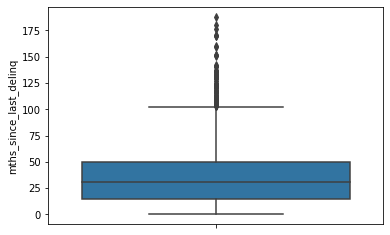

In [32]:
sns.boxplot(y = 'mths_since_last_delinq', data = loans_ind)

Se define una función que seleccionará el valor de la observación dependiendo de los meses transcurridos desde su último delinquency.

In [34]:
def delinq_range(x):
    if x <= 12:
        return 10
    elif x <= 24:
        return 9
    elif x <= 36:
        return 8
    elif x <= 48:
        return 7
    elif x <= 60:
        return 6
    elif x <= 72:
        return 5
    elif x <= 84:
        return 4
    elif x <= 96:
        return 3
    elif x <= 108:
        return 2
    elif x > 108:
        return 1
    else:
        return 0

In [35]:
loans_ind['mths_since_last_delinq'] = loans_ind.mths_since_last_delinq.map(delinq_range)

loans_ind['mths_since_last_delinq']

8          9
10         5
24         0
42         0
91         9
          ..
421088     0
421089    10
421092     0
421093     9
421094     0
Name: mths_since_last_delinq, Length: 460541, dtype: int64

In [36]:
loans_ind['mths_since_last_delinq'].isnull().sum()

0

## Guardado de datasets 

In [97]:
loans_ind.to_csv('../data/loans_ind.csv', index = False)

In [38]:
loans_joint.to_csv('../data/loans_joint.csv', index = False)

### Observar si el dataset esta desbalanceado 

Una vez preparado el Dataset para un análisis EDA, el siguiente paso que se va a realizar es observar si el dataset esta desbalanceado.

In [37]:
loans_ind['loan_status'].value_counts(normalize = True)

1.0    0.748266
0.0    0.251734
Name: loan_status, dtype: float64

Se observa que un 75 % de las observaciones se les entrega el crédito y un 25 % ha mostrado problemas en el pago. El dataset esta ligeramente desbalanceado. Se considera que con un 25 % de resultados negativos se puede entrenar el modelo adecuadamente, por lo que no se va a tratar el dataset.

### Limpieza de NaN's
La limpieza de valores nulos se realizará en los notebooks de ejecución de los modelos mediante pipelines.
Utilizamos pipelines para la transformación de las variables nulas a medias y 0, también para la transformación de las variables categóricas a numéricas para poder trabajar cn ellas.